In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Loading the dataset
df=pd.read_csv("C:/Users/User/Downloads/Admission_Predict_Ver1.1.csv")

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
#Visualozing the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df=df.drop(['Serial No.'], axis=1)

In [6]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Exploratory Data Analysis

In [9]:
df.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Outliers Treating

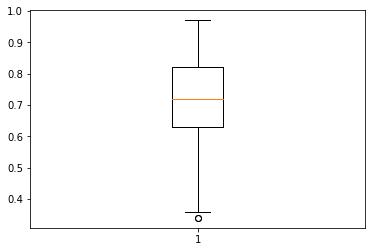

In [11]:
plt.boxplot(df['Chance of Admit '])
plt.show()

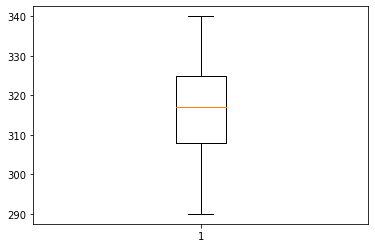

In [12]:
plt.boxplot(df['GRE Score'])
plt.show()

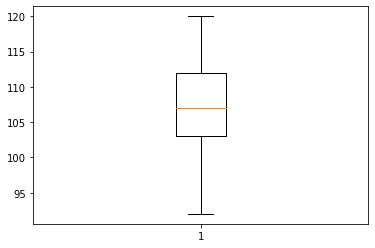

In [13]:
plt.boxplot(df['TOEFL Score'])
plt.show()

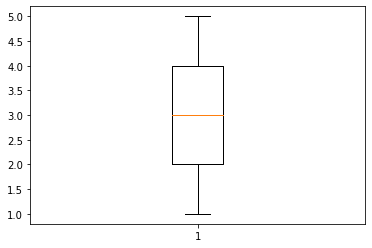

In [14]:
plt.boxplot(df['University Rating'])
plt.show()

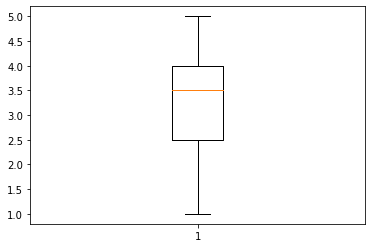

In [15]:
plt.boxplot(df['SOP'])
plt.show()

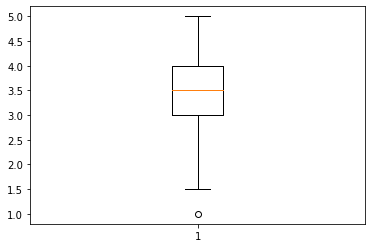

In [16]:
plt.boxplot(df[ 'LOR '])
plt.show()

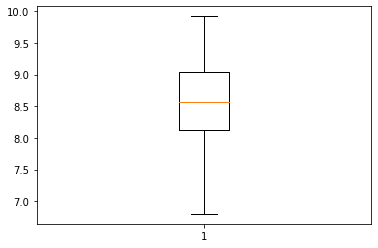

In [17]:
plt.boxplot(df['CGPA'])
plt.show()

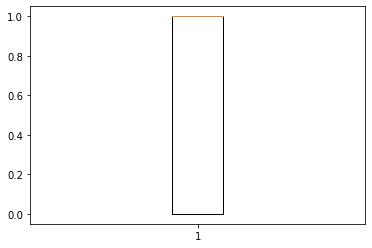

In [18]:
plt.boxplot(df['Research'])
plt.show()

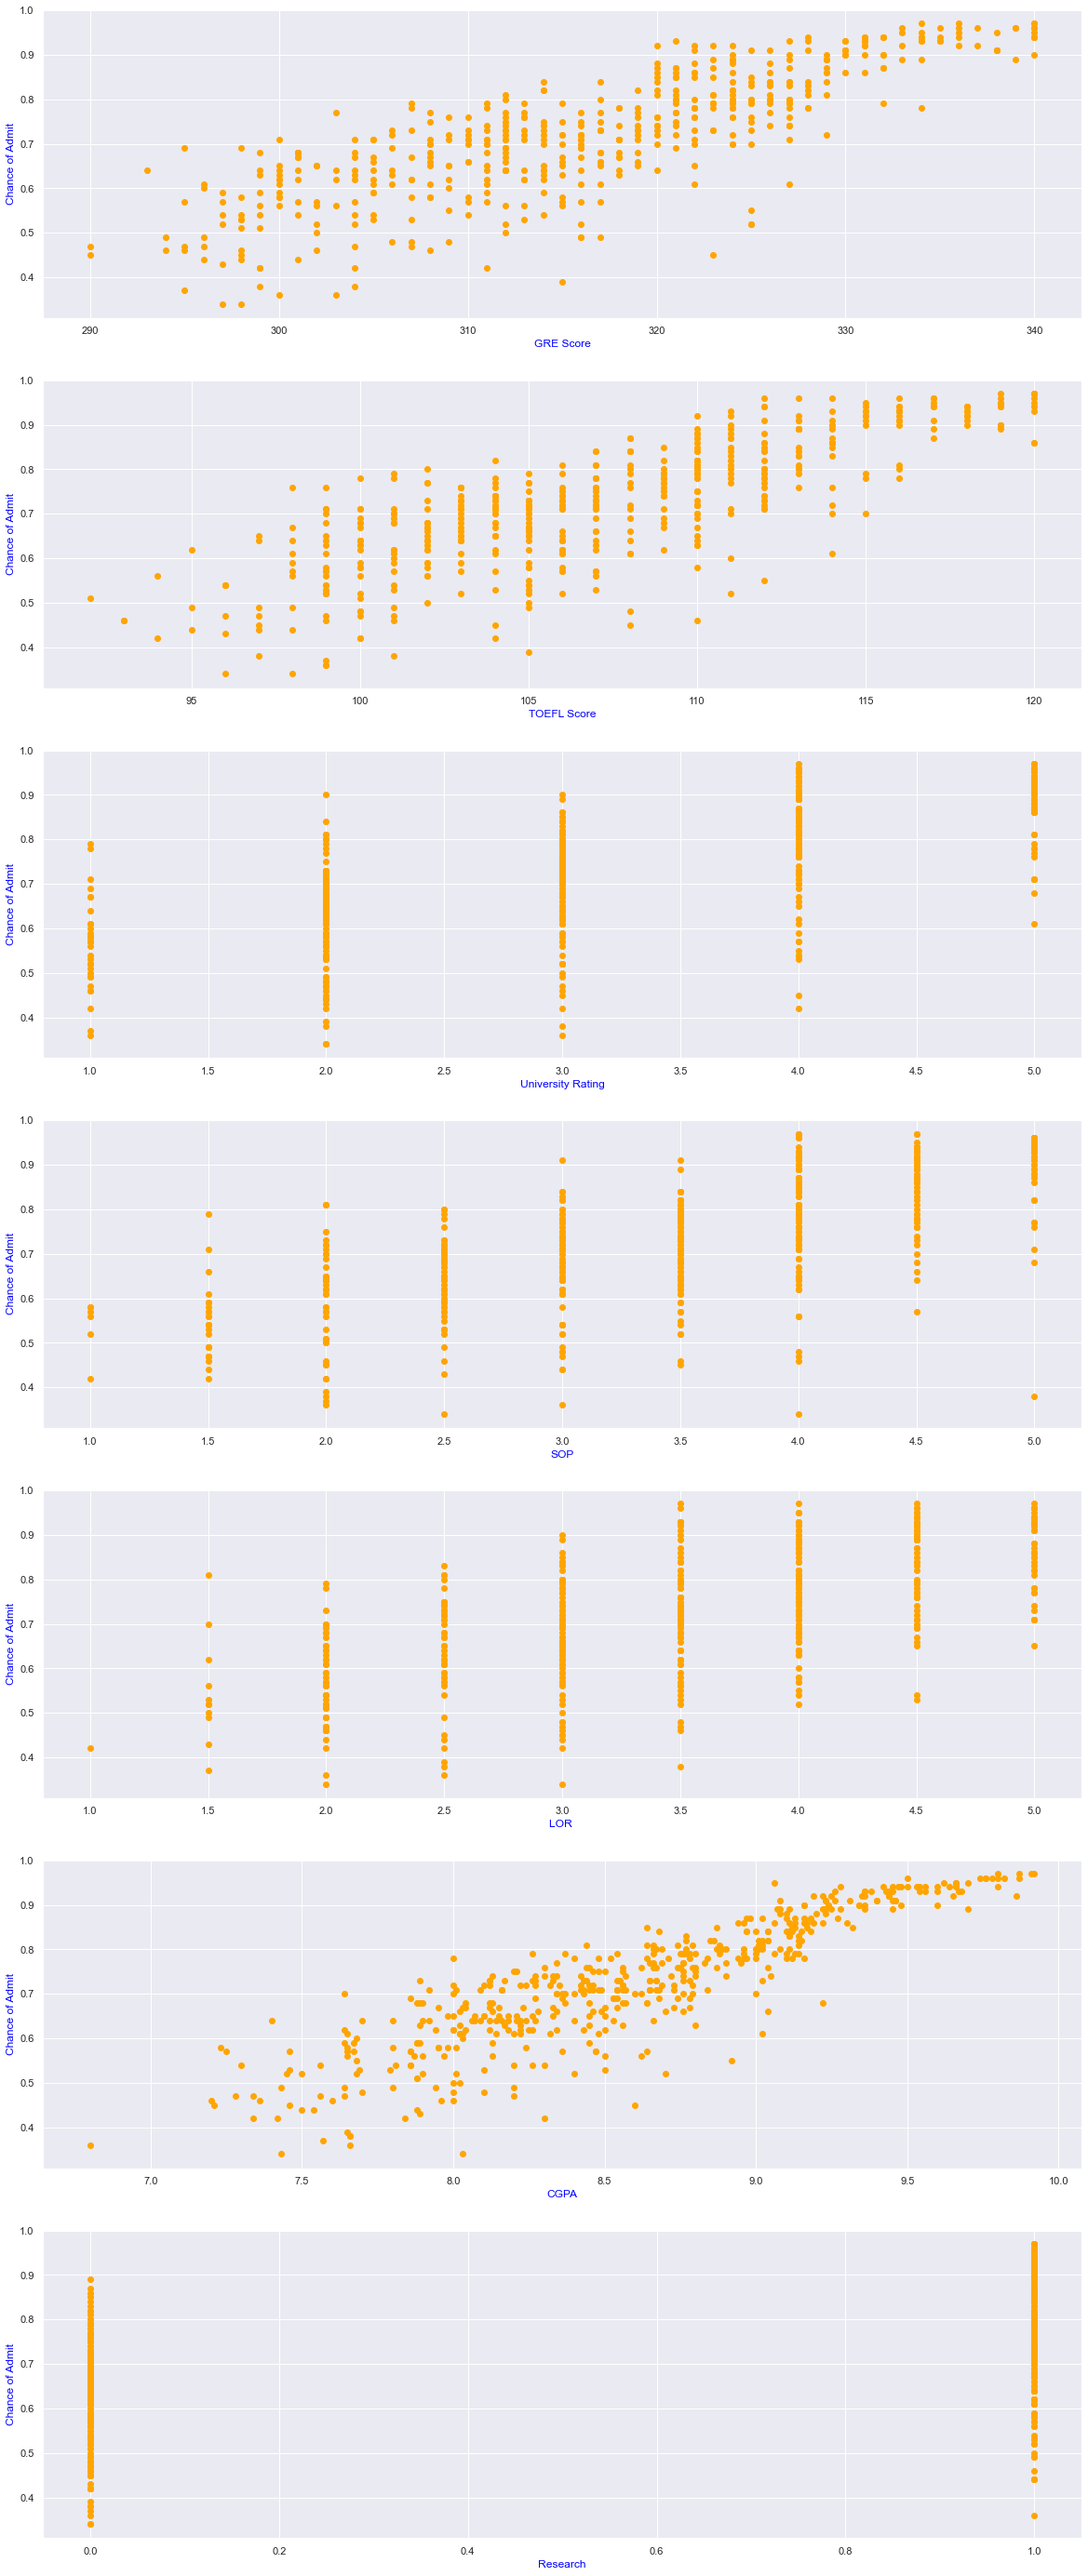

In [19]:
#Scatter Plot
features=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']
target=df[['Chance of Admit ']]
for i,col in enumerate(features):
    sns.set(rc={'figure.figsize':(20,50)})
    plt.subplot(len(features),1,i+1)
    
    a=df[col]
    b=target
    plt.scatter(a,b,marker='o',color="orange")
    plt.xlabel(col,color='blue')
    plt.ylabel('Chance of Admit',color='blue')

plt.show()

# Removing Outliers using IQR method

In [20]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [21]:
df_out=df[((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_out.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [22]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df.shape)

(497, 8)


In [23]:
#Seprating the dataset into x and y values
x=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research']]
y=df[['Chance of Admit ']]

In [24]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [25]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [26]:
print(x.shape)
print(y.shape)

(497, 7)
(497, 1)


In [27]:
df.corr().round(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.00,0.82,0.63,0.61,0.52,0.82,0.56,0.81
TOEFL Score,0.82,1.00,0.65,0.64,0.53,0.81,0.46,0.79
University Rating,0.63,0.65,1.00,0.73,0.60,0.70,0.42,0.69
SOP,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.69
LOR,0.52,0.53,0.60,0.66,1.00,0.63,0.37,0.64
CGPA,0.82,0.81,0.70,0.71,0.63,1.00,0.50,0.88
Research,0.56,0.46,0.42,0.41,0.37,0.50,1.00,0.54
Chance of Admit,0.81,0.79,0.69,0.69,0.64,0.88,0.54,1.00


<AxesSubplot:>

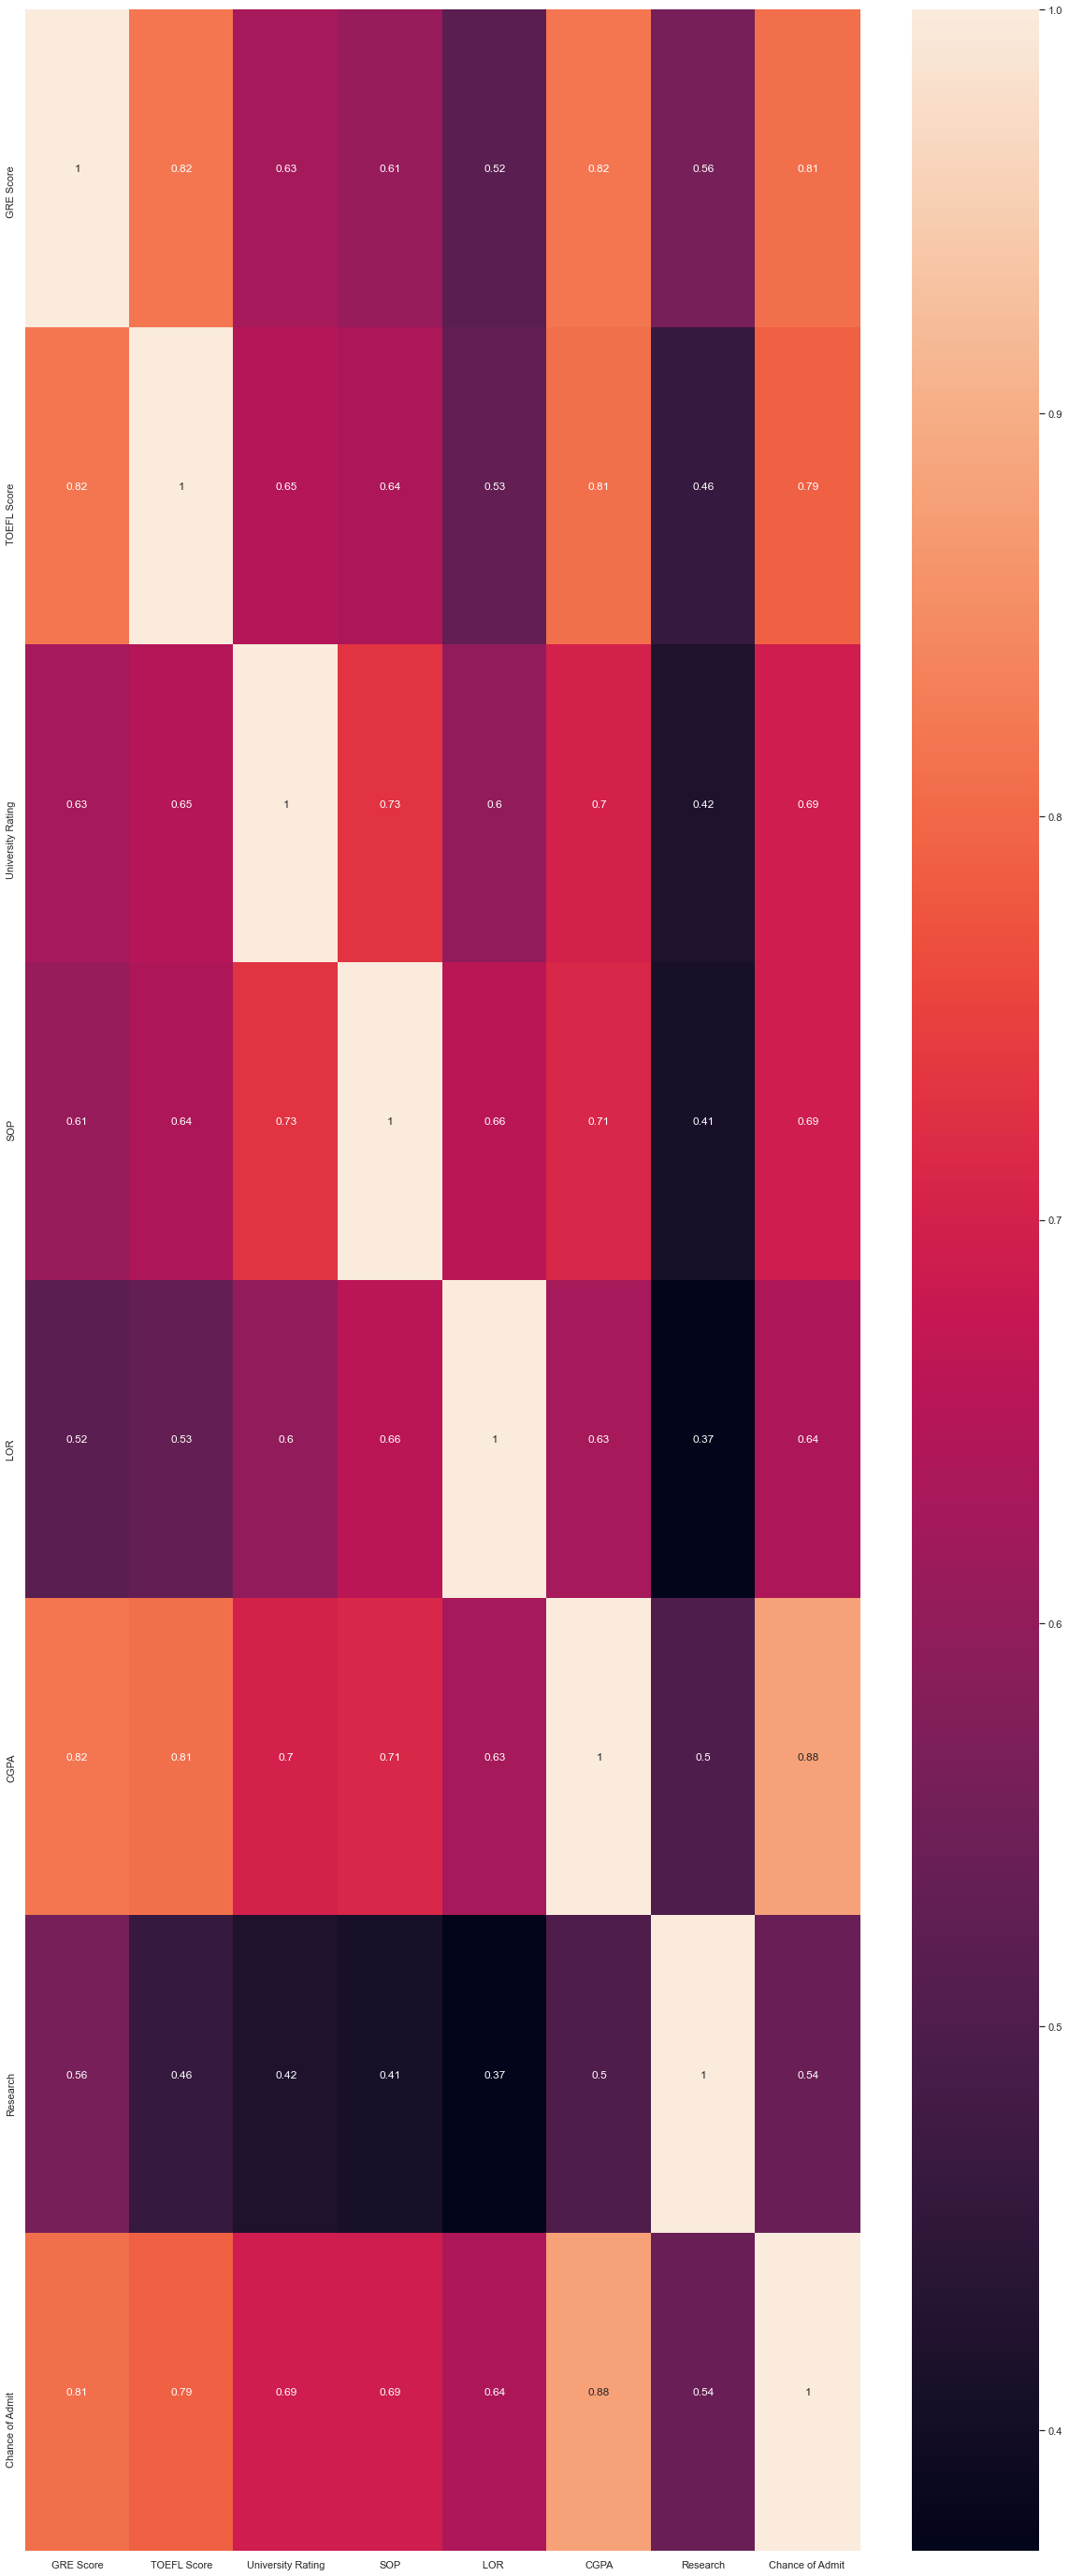

In [28]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr().round(2),annot=True,)

In [29]:
matrix=df.corr()
matrix=matrix.unstack()
matrix[abs(matrix)>=0.6]

GRE Score          GRE Score            1.000000
                   TOEFL Score          0.824360
                   University Rating    0.631514
                   SOP                  0.614286
                   CGPA                 0.823739
                   Chance of Admit      0.807594
TOEFL Score        GRE Score            0.824360
                   TOEFL Score          1.000000
                   University Rating    0.645349
                   SOP                  0.643806
                   CGPA                 0.807282
                   Chance of Admit      0.788128
University Rating  GRE Score            0.631514
                   TOEFL Score          0.645349
                   University Rating    1.000000
                   SOP                  0.727569
                   LOR                  0.603831
                   CGPA                 0.701979
                   Chance of Admit      0.688621
SOP                GRE Score            0.614286
                   T

In [30]:
#Create training and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [31]:
#Training the model
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
#Predicting the model
y_pred =model.predict(x_test)

In [33]:
#MSE and R2-square
mse=(mean_squared_error(y_test,y_pred))
rmse=np.math.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print('MSE  Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE  Value: 0.004201049971877983
RMSE Value: 0.06481550718676807
R2  Value: 0.7743874554323599


In [34]:
#Standardization

scaler=StandardScaler()
scaled=scaler.fit_transform(df)
df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']]=scaler.fit_transform(df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']])
print(df)

     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
0     1.818719     1.781161           0.769761  1.136549  1.097138  1.777188   
1     0.660668    -0.043044           0.769761  0.629489  1.097138  0.478836   
2    -0.051979    -0.540555          -0.107696 -0.384631  0.007672 -0.969326   
3     0.482506     0.454466          -0.107696  0.122429 -1.081793  0.145925   
4    -0.230140    -0.706391          -0.985153 -1.398751 -0.537061 -0.619770   
..         ...          ...                ...       ...       ...       ...   
495   1.373315     0.122793           1.647217  1.136549  0.552405  0.728519   
496   1.818719     1.615324           1.647217  1.643609  1.641871  2.143389   
497   1.195153     2.112834           1.647217  1.136549  1.641871  1.627378   
498  -0.408302    -0.706391           0.769761  0.629489  1.641871 -0.253568   
499   0.927910     0.951977           0.769761  1.136549  1.097138  0.761810   

     Research  Chance of Admit   
0    

<ipython-input-34-203daf6ee626>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']]=scaler.fit_transform(df[['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']])
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [35]:
#Training the model
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
#Predicting the model
y_pred =model.predict(x_test)

In [37]:
#MSE,RMSE and R2-square
mse=np.math.sqrt(mean_squared_error(y_test,y_pred))
rmse=((mean_squared_error(y_test,y_pred)))
r2=r2_score(y_test,y_pred)
print('MSE Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE Value: 0.06481550718676807
RMSE Value: 0.004201049971877983
R2  Value: 0.7743874554323599


In [38]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=400)
model.fit(x_train,y_train)

<ipython-input-38-4bfece364eec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor(n_estimators=400)

In [39]:
y_pred=model.predict(x_test)

In [40]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,y_pred)
print("R2-Score",r2score*100)

R2-Score 74.50238320890162


In [41]:
mse=np.math.sqrt(mean_squared_error(y_test,y_pred))
rmse=((mean_squared_error(y_test,y_pred)))
r2=r2_score(y_test,y_pred)

print('MSE Value: {}'.format(mse))
print('RMSE Value: {}'.format(rmse))
print('R2  Value: {}'.format(r2))

MSE Value: 0.0689044224360816
RMSE Value: 0.004747819431249984
R2  Value: 0.7450238320890161


In [42]:
x=[[314,103,2,2.0,3.0,8.21,0]]

result=model.predict(x)
result

array([0.64565])